In [1]:
import pandas as pd # manipulação de dado em formato de dataframe
import seaborn as sns # biblioteca de visualização de informações estatísticas
import matplotlib.pyplot as plt # biblioteca de visualização de dados
import statsmodels.api as sm # biblioteca de modelagem estatística
import numpy as np # biblioteca para operações matemáticas multidimensionais
from statsmodels.iolib.summary2 import summary_col
from skimage import io
import plotly.graph_objs as go
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder

## Carregando Dados Casos de Sarampo

In [2]:
df1 = pd.read_csv("dados_sus_2018_2022.csv", delimiter=';')
df2 = df1.assign(numberCases = df1['casos confirmados'])
df = df2.drop('casos confirmados', axis=1)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
anomes         58 non-null int64
numberCases    58 non-null int64
dtypes: int64(2)
memory usage: 1.0 KB


In [5]:
df

,anomes,numberCases
0,201802,21
1,201803,189
2,201804,184
3,201805,544
4,201806,1808
5,201807,3463
6,201808,2211
7,201809,614
8,201810,225
9,201811,53


## Carregando Dados Pesquisa Google

In [26]:
df_read = pd.read_csv("termosGoogle.csv")
df_gg = df_read[['anomes','sarampo']]
df_gg

,anomes,sarampo
0,201801,2.25
1,201802,4.25
2,201803,8.25
3,201804,6.80
4,201805,4.50
5,201806,5.50
6,201807,54.40
7,201808,50.75
8,201809,11.80
9,201810,7.00


## Juntando as 2 bases

In [10]:
df_f = pd.merge(df, df_gg, on='anomes', how='inner')
df_f

,anomes,numberCases,sarampo
0,201802,21,4.250000
1,201803,189,8.500000
2,201804,184,6.800000
3,201805,544,4.500000
4,201806,1808,5.750000
5,201807,3463,55.200000
6,201808,2211,51.250000
7,201809,614,11.800000
8,201810,225,7.250000
9,201811,53,6.000000


## Estatistica Descritiva

In [11]:
df_f.describe()

,anomes,numberCases,sarampo
count,58.000000,58.000000,58.000000
mean,202006.500000,684.431034,26.548851
std,139.940746,1303.144310,24.742761
min,201802.000000,2.000000,2.000000
25%,201904.250000,21.000000,6.762500
50%,202006.500000,70.000000,11.500000
75%,202108.750000,524.000000,45.750000
max,202211.000000,5962.000000,89.750000


<function matplotlib.pyplot.show(*args, **kw)>

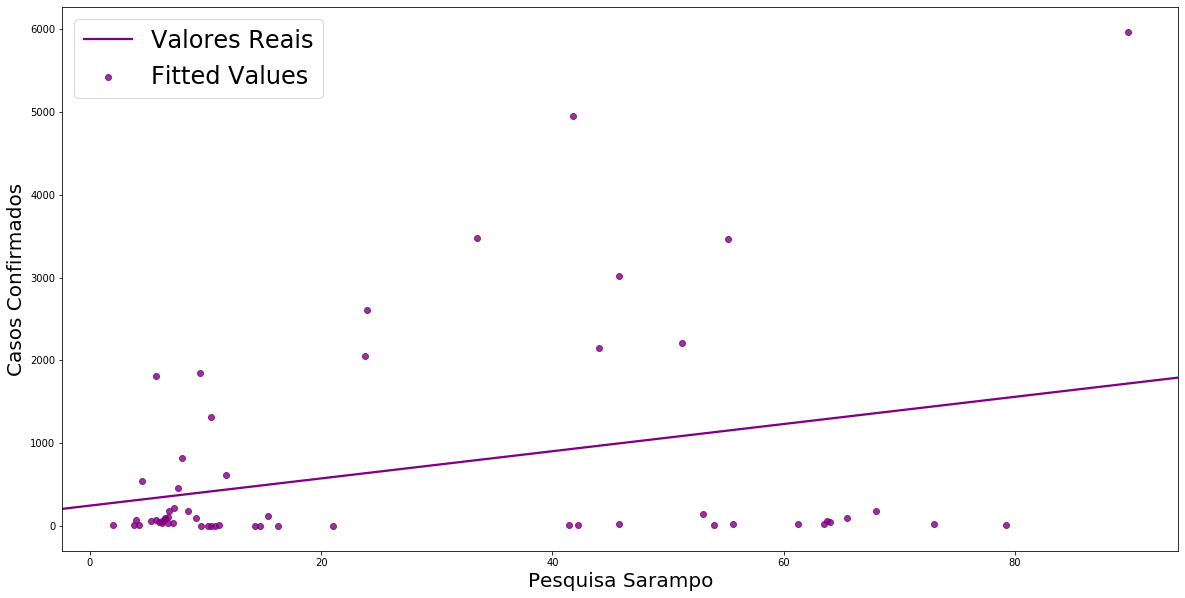

In [12]:
# In[ ]: Gráfico de dispersão

#Regressão linear que melhor se adequa às obeservações: função 'sns.regplot'

plt.figure(figsize=(20,10))
sns.regplot(data=df_f, x='sarampo', y='numberCases', ci=False, color='purple')
plt.xlabel('Pesquisa Sarampo', fontsize=20)
plt.ylabel('Casos Confirmados', fontsize=20)
plt.legend(['Valores Reais', 'Fitted Values'], fontsize=24)
plt.show

## Modelo Regressao Linear Simples

In [13]:
# In[ ]: Estimação do modelo de regressão linear simples

#Estimação do modelo
modelo = sm.OLS.from_formula("numberCases ~ sarampo", df_f).fit()

In [14]:
#Observação dos parâmetros resultantes da estimação
modelo.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            numberCases   R-squared:                       0.097
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     6.012
Date:                Sun, 24 Mar 2024   Prob (F-statistic):             0.0173
Time:                        09:08:29   Log-Likelihood:                -494.84
No. Observations:                  58   AIC:                             993.7
Df Residuals:                      56   BIC:                             997.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    249.0464    241.745      1.030      0.307    -235.228     733.321
sarampo       16.3994      6.688      2.452      0.017       3.001      29.797
==============================================================================
Omnibus:                       26.563   Durbin-Watson:                   0.266
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.499
Skew:                           1.637   Prob(JB):                     5.91e-10
Kurtosis:                       5.620   Cond. No.                         53.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
df_f['yhat'] = modelo.fittedvalues
df_f['erro'] = modelo.resid
df_f

,anomes,numberCases,sarampo,yhat,erro
0,201802,21,4.250000,318.743777,-297.743777
1,201803,189,8.500000,388.441130,-199.441130
2,201804,184,6.800000,360.562189,-176.562189
3,201805,544,4.500000,322.843622,221.156378
4,201806,1808,5.750000,343.342843,1464.657157
5,201807,3463,55.200000,1154.292035,2308.707965
6,201808,2211,51.250000,1089.514496,1121.485504
7,201809,614,11.800000,442.559074,171.440926
8,201810,225,7.250000,367.941908,-142.941908
9,201811,53,6.000000,347.442687,-294.442687


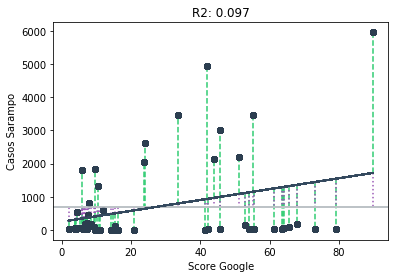

In [16]:
y = df_f['numberCases']
yhat = df_f['yhat']
x = df_f['sarampo']
mean = np.full(x.shape[0] , y.mean(), dtype=int)

for i in range(len(x)-1):
    plt.plot([x[i],x[i]], [yhat[i],y[i]],'--', color='#2ecc71')
    plt.plot([x[i],x[i]], [yhat[i],mean[i]], ':', color='#9b59b6')
    plt.plot(x, y, 'o', color='#2c3e50')
    plt.axhline(y = y.mean(), color = '#bdc3c7', linestyle = '-')
    plt.plot(x,yhat, color='#34495e')
    plt.title('R2: ' + str(round(modelo.rsquared,4)))
    plt.xlabel("Score Google")
    plt.ylabel("Casos Sarampo")
plt.show()

In [17]:
df_f[['numberCases','sarampo']].corr()

,numberCases,sarampo
numberCases,1.000000,0.311374
sarampo,0.311374,1.000000


In [18]:
(df_f[['numberCases','sarampo']].corr())**2

,numberCases,sarampo
numberCases,1.000000,0.096954
sarampo,0.096954,1.000000


<function matplotlib.pyplot.show(*args, **kw)>

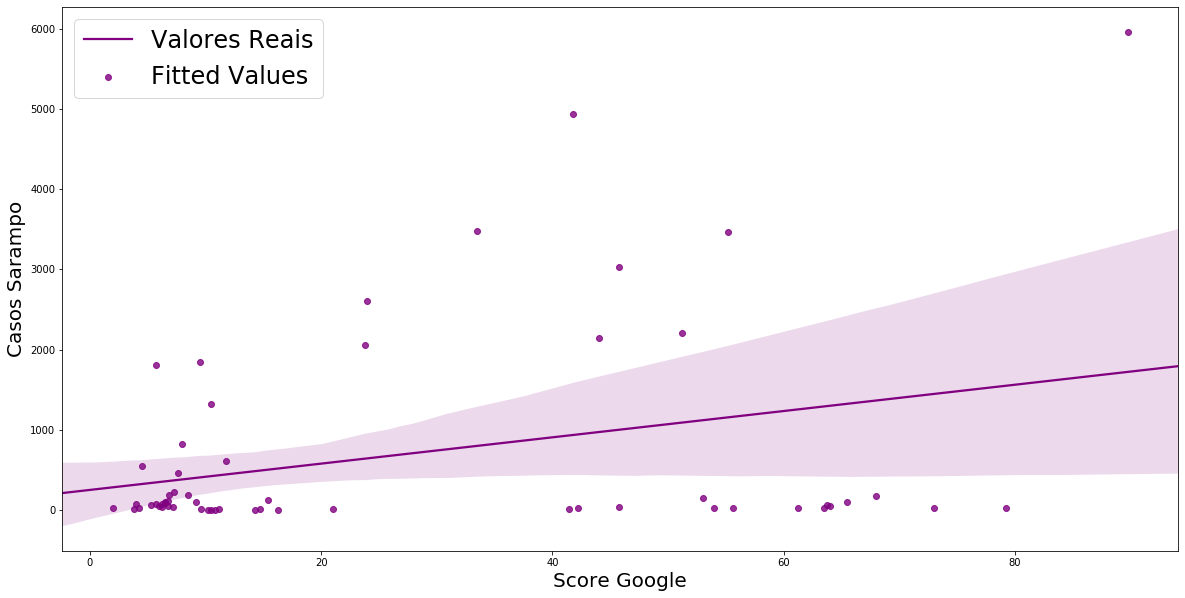

In [19]:
#Plotando o intervalo de confiança de 95%
plt.figure(figsize=(20,10))
sns.regplot(data=df_f, x='sarampo', y='numberCases', ci=95, color='purple')
plt.xlabel('Score Google', fontsize=20)
plt.ylabel('Casos Sarampo', fontsize=20)
plt.legend(['Valores Reais', 'Fitted Values'], fontsize=24)
plt.show

In [20]:
#Nível de significância de 5% / Nível de confiança de 95%
modelo.conf_int(alpha=0.05)

,0,1
Intercept,-235.227988,733.320838
sarampo,3.001425,29.797329


## Modelo Regressao Linear Multipla

In [25]:
df_read = pd.read_csv("termosGoogle.csv")
df_gg_mult = df_read[['anomes','sarampo','febre','tosse']]
df_gg_mult

,anomes,sarampo,febre,tosse
0,201801,2.25,58.75,30.75
1,201802,4.25,23.25,34.00
2,201803,8.25,13.25,48.25
3,201804,6.80,10.80,70.00
4,201805,4.50,8.50,89.75
5,201806,5.50,7.50,90.50
6,201807,54.40,6.80,85.80
7,201808,50.75,6.25,67.75
8,201809,11.80,6.60,68.60
9,201810,7.00,6.75,56.25


## Juntando as 2 bases

In [29]:
df_f = pd.merge(df, df_gg_mult, on='anomes', how='inner')
df_f

KeyError: 'anomes'

In [104]:
#Características das variáveis do dataset
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 5 columns):
anomes         58 non-null int64
numberCases    58 non-null int64
sarampo        58 non-null float64
febre          58 non-null float64
tosse          58 non-null float64
dtypes: float64(3), int64(2)
memory usage: 2.7 KB


In [105]:
#Estatísticas univariadas
df_f.describe()

,anomes,numberCases,sarampo,febre,tosse
count,58.000000,58.000000,58.000000,58.000000,58.000000
mean,202006.500000,684.431034,26.787069,43.393966,49.040517
std,139.940746,1303.144310,24.753257,23.899960,21.008184
min,201802.000000,2.000000,2.000000,6.250000,21.000000
25%,201904.250000,21.000000,7.000000,32.375000,30.875000
50%,202006.500000,70.000000,11.200000,40.625000,43.500000
75%,202108.750000,524.000000,49.125000,65.937500,68.350000
max,202211.000000,5962.000000,89.750000,94.250000,90.000000


In [106]:
# In[ ]: Gráfico 3D com scatter

import plotly.io as pio
pio.renderers.default = 'browser'

trace = go.Scatter3d(
    x=df_f['sarampo'], 
    y=df_f['febre'], 
    z=df_f['numberCases'], 
    mode='markers',
    marker={
        'size': 5,
        'opacity': 0.8,
    },
)

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    width=800,
    height=800,
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)
plot_figure.update_layout(scene = dict(
                        xaxis_title='Score Sarampo',
                        yaxis_title='Score Febre',
                        zaxis_title='Casos Sarampo'))
plot_figure.show()

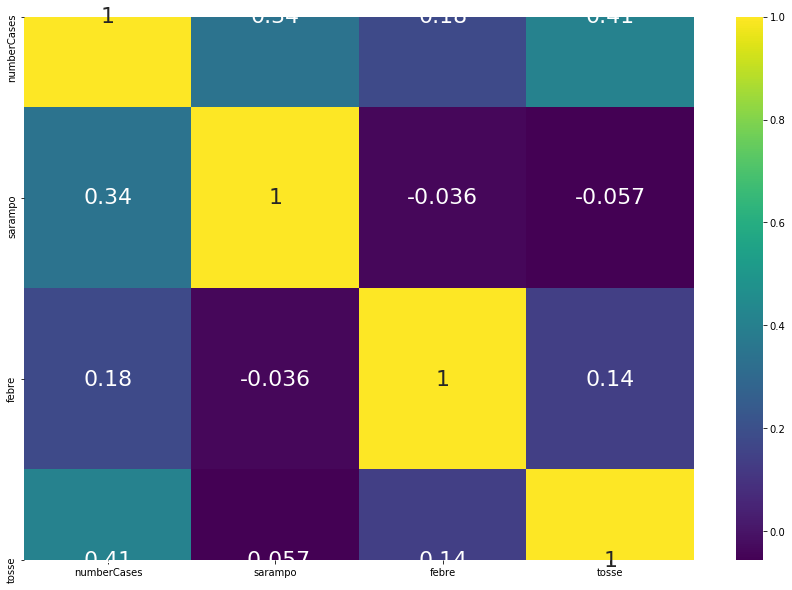

In [108]:
# In[ ]: Matriz de correlações

df_corr = df_f.drop('anomes',axis=1)
corr = df_corr.corr()
corr

plt.figure(figsize=(15,10))
sns.heatmap(df_corr.corr(), annot=True, cmap = plt.cm.viridis,
            annot_kws={'size':22})
plt.show()

#Palettes de cores
#sns.color_palette("viridis", as_cmap=True)
#sns.color_palette("magma", as_cmap=True)
#sns.color_palette("inferno", as_cmap=True)
#sns.color_palette("Blues", as_cmap=True)
#sns.color_palette("Greens", as_cmap=True)
#sns.color_palette("Reds", as_cmap=True)

<Figure size 1080x720 with 0 Axes>

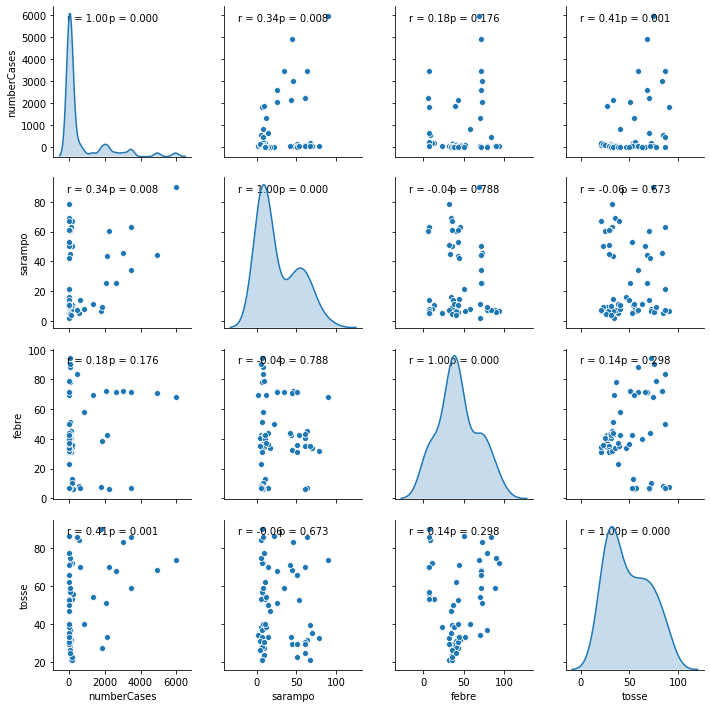

In [109]:
# In[ ]: Distribuições das variáveis, scatters, valores das correlações e suas
#respectivas significâncias

def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

plt.figure(figsize=(15,10))
graph = sns.pairplot(df_corr, diag_kind="kde")
graph.map(corrfunc)
plt.show()

In [117]:
# In[ ]: Estimando um modelo múltiplo com as variáveis do dataset 'paises'

#Estimando a regressão múltipla
modelo_mult = sm.OLS.from_formula("numberCases ~ sarampo + febre + tosse", df_f).fit()

In [118]:
#Parâmetros do modelo
modelo_mult.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            numberCases   R-squared:                       0.320
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     8.489
Date:                Sun, 28 May 2023   Prob (F-statistic):           0.000103
Time:                        21:51:19   Log-Likelihood:                -486.60
No. Observations:                  58   AIC:                             981.2
Df Residuals:                      54   BIC:                             989.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1413.1911    468.852     -3.014      0.004   -2353.184    -473.199
sarampo       19.5835      5.918      3.309      0.002       7.719      31.448
febre          7.4477      6.179      1.205      0.233      -4.940      19.836
tosse         25.4861      7.036      3.622      0.001      11.379      39.593
==============================================================================
Omnibus:                       12.181   Durbin-Watson:                   0.395
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.675
Skew:                           0.977   Prob(JB):                      0.00177
Kurtosis:                       4.194   Cond. No.                         241.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [119]:
#Parâmetros do modelo com intervalos de confiança
#Nível de significância de 5% / Nível de confiança de 95%
modelo_mult.conf_int(alpha=0.05)

,0,1
Intercept,-2353.183508,-473.198718
sarampo,7.719467,31.447577
febre,-4.940460,19.835935
tosse,11.379178,39.592965


In [120]:
# In[ ]: Procedimento Stepwise

# Instalação e carregamento da função 'stepwise' do pacote
#'stepwise_process.statsmodels'
#pip install "stepwise-process==2.5"
# Autores: Helder Prado Santos e Luiz Paulo Fávero
from stepwise_process.statsmodels import stepwise

# Estimação do modelo por meio do procedimento Stepwise
modelo_step_mult = stepwise(modelo_mult, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 numberCases ~ sarampo + febre + tosse

 Discarding atribute "febre" with p-value equal to 0.23333294947779593 

Estimating model...: 
 numberCases ~ sarampo + tosse

 No more atributes with p-value higher than 0.05

 Atributes discarded on the process...: 

{'atribute': 'febre', 'p-value': 0.23333294947779593}

 Model after stepwise process...: 
 numberCases ~ sarampo + tosse 

                            OLS Regression Results                            
Dep. Variable:            numberCases   R-squared:                       0.302
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     11.91
Date:                Sun, 28 May 2023   Prob (F-statistic):           5.05e-05
Time:                        21:52:51   Log-Likelihood:                -487.37
No. Observations:                  58   AIC:                             980.7
Df Residuals:       

In [121]:
# In[ ]: Teste de verificação da aderência dos resíduos à normalidade

# Teste de Shapiro-Wilk (n < 30)
#from scipy.stats import shapiro
#shapiro(modelo_linear.resid)

# Teste de Shapiro-Francia (n >= 30)
# Instalação e carregamento da função 'shapiroFrancia' do pacote
#'sfrancia'
# Autores: Luiz Paulo Fávero e Helder Prado Santos
#pip install sfrancia==1.0.8
from sfrancia import shapiroFrancia
shapiroFrancia(modelo_step_mult.resid)

{'method': 'Shapiro-Francia normality test',
 'statistics W': 0.9088990929132069,
 'statistics z': 3.1951624121776527,
 'p-value': 0.0006987608597489179}

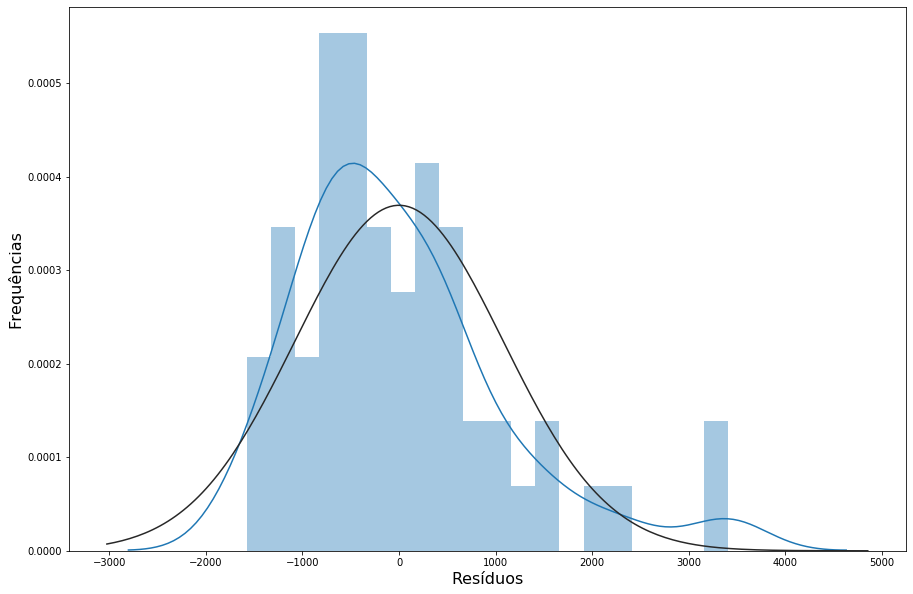

In [122]:
# In[ ]: Plotando os resíduos do modelo step_empresas e acrescentando
#uma curva normal teórica para comparação entre as distribuições

from scipy.stats import norm

plt.figure(figsize=(15,10))
sns.distplot(modelo_step_mult.resid, fit=norm, kde=True, bins=20)
plt.xlabel('Resíduos', fontsize=16)
plt.ylabel('Frequências', fontsize=16)
plt.show()

In [123]:
summary_col([modelo, modelo_step_mult],
            model_names=["SIMPLES","MULTIPLA"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs))
        })

,SIMPLES,MULTIPLA
Intercept,199.6224,-1141.6463***
,(239.9900),(412.8680)
sarampo,18.0986***,19.3799***
,(6.6062),(5.9395)
tosse,,26.6504***
,,(6.9983)
N,58,58


In [124]:
df_f['yhat_simples'] = modelo.fittedvalues
df_f['yhat_step_mult'] = modelo_step_mult.fittedvalues

In [125]:
df_f

,anomes,numberCases,sarampo,febre,tosse,yhat_simples,yhat_step_mult
0,201802,21,5.50,23.00,38.50,299.164771,-9.017928
1,201803,189,10.50,13.25,53.25,389.657798,480.974265
2,201804,184,7.80,10.20,72.20,340.791563,933.673118
3,201805,544,5.50,8.00,84.50,299.164771,1216.898971
4,201806,1808,6.50,7.25,90.00,317.263376,1382.855846
5,201807,3463,62.80,7.00,86.00,1336.214867,2367.340202
6,201808,2211,60.50,6.25,70.00,1294.588074,1896.360658
7,201809,614,13.80,6.60,70.00,449.383196,991.321439
8,201810,225,8.00,6.50,56.00,344.411284,505.813138
9,201811,53,6.75,6.75,56.75,321.788027,501.576095


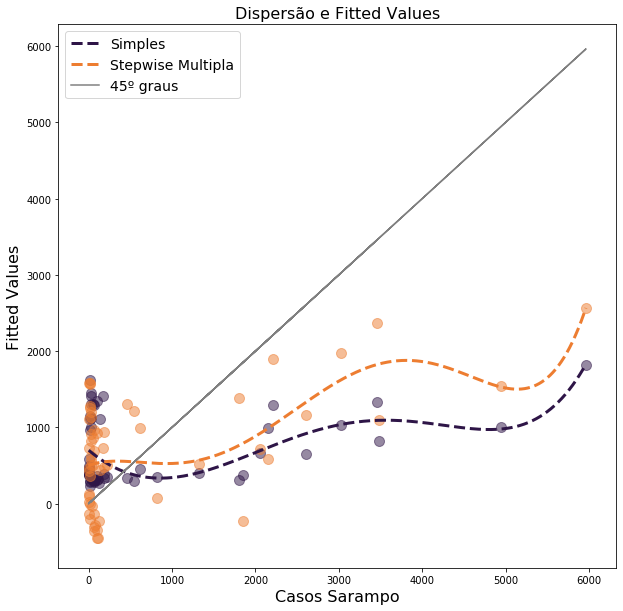

In [126]:
# In[ ]: Ajustes dos modelos: valores previstos (fitted values) X valores reais

from scipy.optimize import curve_fit

def objective(x, a, b, c, d, e, f):
    return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f

xdata = df_f['numberCases']
ydata_simp = df_f['yhat_simples']
ydata_mult = df_f['yhat_step_mult']

plt.figure(figsize=(10,10))

popt, _ = curve_fit(objective, xdata, ydata_simp)
a, b, c, d, e, f = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e, f)
plt.plot(x_line, y_line, '--', color='#2e1547', linewidth=3)

popt, _ = curve_fit(objective, xdata, ydata_mult)
a, b, c, d, e, f = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e, f)
plt.plot(x_line, y_line, '--', color='#ed7d31', linewidth=3)

plt.plot(xdata,xdata, color='gray', linestyle='-')
plt.scatter(xdata,ydata_simp, alpha=0.5, s=100, color='#2e1547')
plt.scatter(xdata,ydata_mult, alpha=0.5, s=100, color='#ed7d31')
plt.xlabel('Casos Sarampo', fontsize=16)
plt.ylabel('Fitted Values', fontsize=16)
plt.legend(['Simples','Stepwise Multipla','45º graus'], fontsize=14)
plt.title('Dispersão e Fitted Values', fontsize=16)
plt.show()

In [130]:
# Diagnóstico de multicolinearidade (Variance Inflation Factor e Tolerance)

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_f[['sarampo','tosse']]
X = sm.add_constant(X)

vif = pd.Series([variance_inflation_factor(X.values, i)
                 for i in range(X.shape[1])],index=X.columns)
vif

tolerance = 1/vif
tolerance

pd.concat([vif,tolerance], axis=1, keys=['VIF', 'Tolerance'])

,VIF,Tolerance
const,8.050267,0.124219
sarampo,1.003219,0.996791
tosse,1.003219,0.996791


In [132]:
# In[ ]: Função para o teste de Breusch-Pagan para a elaboração
# de diagnóstico de heterocedasticidade


# Criação da função 'breusch_pagan_test'

from scipy import stats

def breusch_pagan_test(modelo):

    df = pd.DataFrame({'yhat':modelo.fittedvalues,
                       'resid':modelo.resid})
   
    df['up'] = (np.square(df.resid))/np.sum(((np.square(df.resid))/df.shape[0]))
   
    modelo_aux = sm.OLS.from_formula('up ~ yhat', df).fit()
   
    anova_table = sm.stats.anova_lm(modelo_aux, typ=2)
   
    anova_table['sum_sq'] = anova_table['sum_sq']/2
    
    chisq = anova_table['sum_sq'].iloc[0]
   
    p_value = stats.chi2.pdf(chisq, 1)*2
    
    print(f"chisq: {chisq}")
    
    print(f"p-value: {p_value}")
    
    return chisq, p_value


# In[ ]: Teste de Breusch-Pagan propriamente dito

breusch_pagan_test(modelo_step_mult)
#Presença de heterocedasticidade -> omissão de variável(is) explicativa(s)
#relevante(s)

#H0 do teste: ausência de heterocedasticidade.
#H1 do teste: heterocedasticidade, ou seja, correlação entre resíduos e
#uma ou mais variáveis explicativas, o que indica omissão de
#variável relevante!

chisq: 24.44134664952258
p-value: 7.952551790072926e-07


(24.44134664952258, 7.952551790072926e-07)

In [ ]:
#Usar modelo_step_mult

In [133]:
# In[ ]: Gráfico 3D com scatter e fitted values resultantes do modelo

trace = go.Scatter3d(
    x=df_f['sarampo'], 
    y=df_f['tosse'], 
    z=df_f['numberCases'], 
    mode='markers',
    marker={
        'size': 5,
        'opacity': 0.8,
    },
)

layout = go.Layout(
    margin={'l': 0, 'r': 0, 'b': 0, 't': 0},
    width=800,
    height=800,
    xaxis_title='X AXIS TITLE',
)

data = [trace]

plot_figure = go.Figure(data=data, layout=layout)
plot_figure.add_trace(go.Mesh3d(
                    x=df_f['sarampo'], 
                    y=df_f['tosse'], 
                    z=df_f['yhat_step_mult'], 
                    opacity=0.5,
                    color='pink'
                  ))
plot_figure.update_layout(scene = dict(
                        xaxis_title='Score Sarampo',
                        yaxis_title='Score Tosse',
                        zaxis_title='Casos Sarampo'))
plot_figure.show()

In [ ]:
#TCC
#Como foi feito o modelo
#1. Selecao de variavies (sarampo e sintomas)
#2. Teste F p<0.05
#3. Teste t por Beta p<0.05
#4. Stepwise (remove vars)
#5. Teste normalidade dos erros p<0.05
#6. Multicolinearidade Tolerance ~ 1
#7. Hetrocedasticidade p<0.05 (ruim)

#Discussao: eh possivel um modelo para prever sarampo, mas, conforme visto pelo teste de Heterocedasticidade, muitas variavieis
#foram deixadas de fora, sendo necessario buscar mais variaveis (mais sintomas + dados de vacina e sociodemograficos)

In [4]:
#proximo modelo de regressao linear multipla

#termos do google: coriza, conjuntivite, exantema maculopapular, manchas de Koplik (pequenos pontos brancos na mucosa oral), descamação furfurácea (as manchas tornam-se escurecidas e surge descamação fina, lembrando farinha)
#fotofobia
#https://rmmg.org/artigo/detalhes/2629

#manchas vermelhas no corpo
#https://www.saude.ba.gov.br/suvisa/vigilancia-epidemiologica/doencas-imunopreveniveis/doencas-exantematicas/#:~:text=%C3%89%20uma%20doen%C3%A7a%20infecciosa%20aguda,%2C%20espirrar%2C%20falar%20ou%20respirar.

termos = ['sarampo','tosse','febre','coriza','conjuntivite','exantema maculopapular','exantema','manchas de Koplik','Koplik','manchas vermelhas no corpo','manchas vermelhas','fotofobia']

## Juntando as 2 bases

In [8]:
df_f = pd.merge(df, df_word, on='anomes', how='inner')
df_f

,anomes,numberCases,sarampo,tosse,febre,coriza,conjuntivite,exantema_maculopapular,exantema,manchas_de_Koplik,Koplik,manchas_vermelhas_no_corpo,manchas_vermelhas,fotofobia
0,201802,21,4.25,34.00,23.25,52.75,43.50,0.00,58.75,0.00,0.00,53.75,70.25,70.50
1,201803,189,8.25,48.25,13.25,63.50,86.50,12.50,66.50,22.25,11.50,60.25,75.00,71.00
2,201804,184,6.80,70.00,10.80,83.00,50.40,0.00,66.20,0.00,0.00,57.40,74.80,77.60
3,201805,544,4.50,89.75,8.50,83.75,26.50,13.50,59.00,0.00,0.00,69.00,69.25,66.75
4,201806,1808,5.50,90.50,7.50,85.00,19.75,14.75,62.25,0.00,24.50,62.25,62.25,53.00
5,201807,3463,54.40,85.80,6.80,74.40,18.80,0.00,68.20,34.40,52.40,49.60,70.20,59.00
6,201808,2211,50.75,67.75,6.25,70.75,18.50,0.00,58.50,18.50,31.25,44.00,66.50,59.00
7,201809,614,11.80,68.60,6.60,63.20,20.00,9.60,70.00,32.40,18.20,69.00,68.00,57.00
8,201810,225,7.00,56.25,6.75,54.00,20.25,25.00,73.50,0.00,28.75,55.25,70.25,50.75
9,201811,53,5.75,53.75,7.00,58.00,19.25,33.25,77.50,0.00,41.75,58.50,76.25,79.75


In [9]:
#Características das variáveis do dataset
df_f.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58 entries, 0 to 57
Data columns (total 14 columns):
anomes                        58 non-null int64
numberCases                   58 non-null int64
sarampo                       58 non-null float64
tosse                         58 non-null float64
febre                         58 non-null float64
coriza                        58 non-null float64
conjuntivite                  58 non-null float64
exantema_maculopapular        58 non-null float64
exantema                      58 non-null float64
manchas_de_Koplik             58 non-null float64
Koplik                        58 non-null float64
manchas_vermelhas_no_corpo    58 non-null float64
manchas_vermelhas             58 non-null float64
fotofobia                     58 non-null float64
dtypes: float64(12), int64(2)
memory usage: 6.8 KB


In [10]:
#Estatísticas univariadas
df_f.describe()

,anomes,numberCases,sarampo,tosse,febre,coriza,conjuntivite,exantema_maculopapular,exantema,manchas_de_Koplik,Koplik,manchas_vermelhas_no_corpo,manchas_vermelhas,fotofobia
count,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000,58.000000
mean,202006.500000,684.431034,26.038793,48.052586,42.836207,47.350000,61.707759,11.893966,66.184483,10.559483,22.549138,66.222414,78.468103,66.963793
std,139.940746,1303.144310,24.804196,21.507268,23.117119,23.971039,21.808919,16.525345,11.674531,14.333730,20.931497,11.430254,9.243227,10.271481
min,201802.000000,2.000000,2.000000,17.750000,6.250000,4.750000,18.200000,0.000000,39.000000,0.000000,0.000000,44.000000,62.250000,44.600000
25%,201904.250000,21.000000,6.375000,31.212500,32.812500,28.562500,50.100000,0.000000,58.312500,0.000000,0.000000,57.450000,70.312500,59.062500
50%,202006.500000,70.000000,10.800000,43.000000,40.750000,51.250000,64.300000,0.000000,66.850000,0.000000,16.400000,64.775000,77.200000,68.050000
75%,202108.750000,524.000000,47.687500,68.087500,60.187500,63.437500,77.150000,16.262500,75.200000,19.325000,38.425000,72.300000,85.987500,74.300000
max,202211.000000,5962.000000,90.500000,90.500000,94.000000,92.000000,96.000000,69.800000,90.800000,58.000000,77.250000,91.750000,98.000000,86.000000


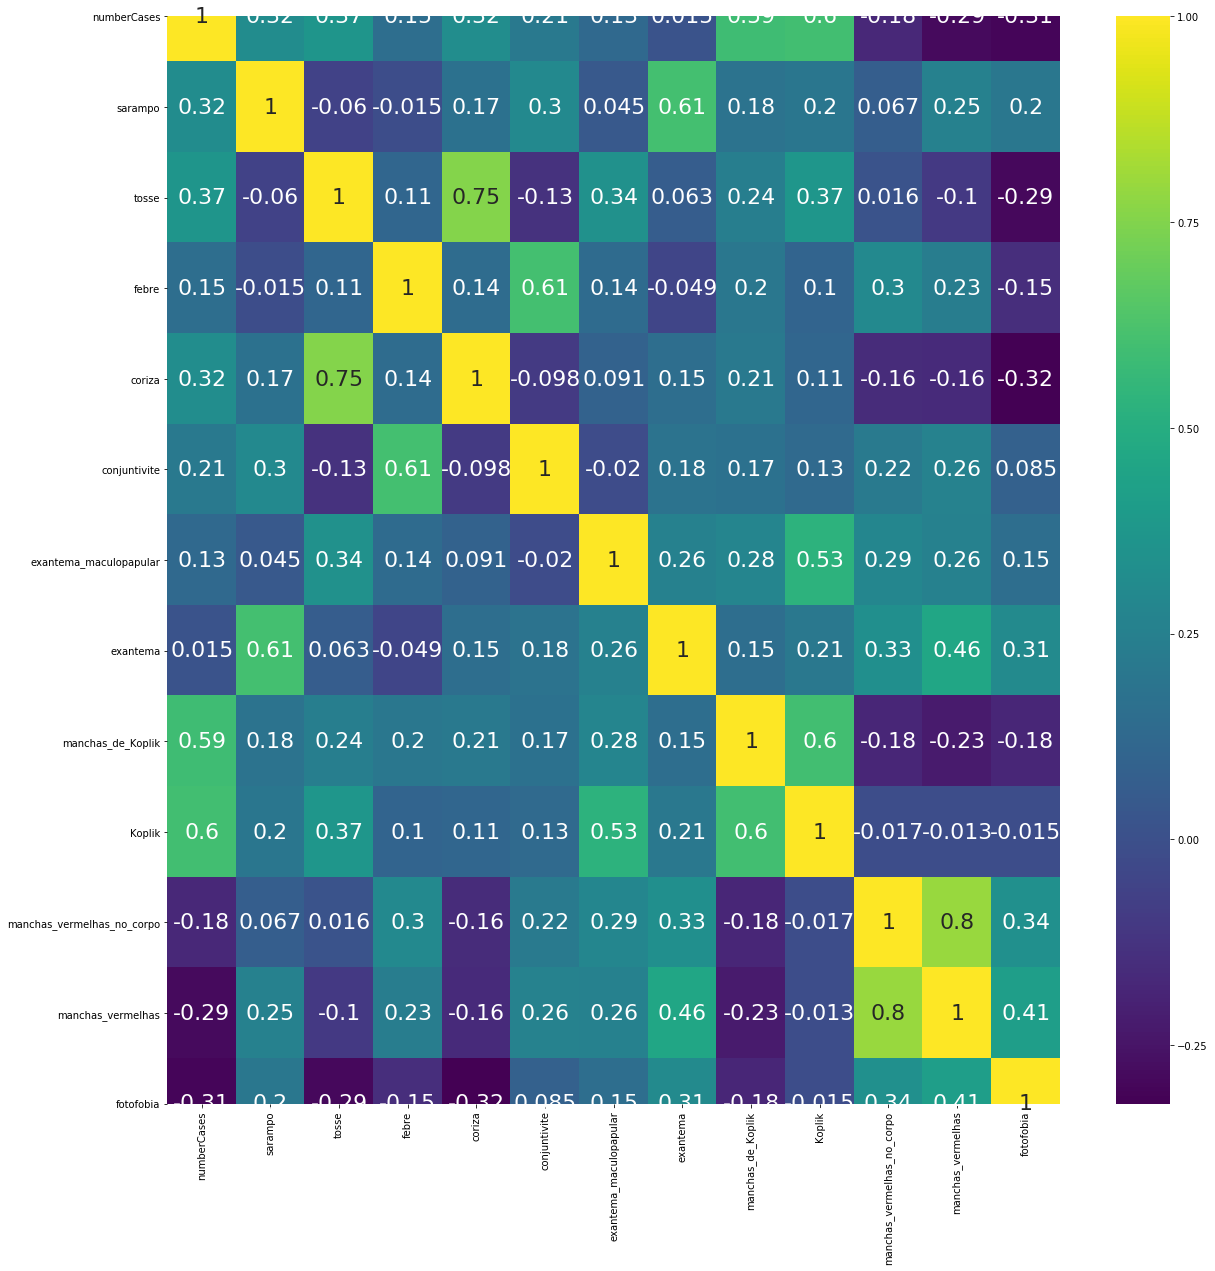

In [14]:
# In[ ]: Matriz de correlações

df_corr = df_f.drop('anomes',axis=1)
corr = df_corr.corr()
corr

plt.figure(figsize=(20,20))
sns.heatmap(df_corr.corr(), annot=True, cmap = plt.cm.viridis,
            annot_kws={'size':22})
plt.show()

#Palettes de cores
#sns.color_palette("viridis", as_cmap=True)
#sns.color_palette("magma", as_cmap=True)
#sns.color_palette("inferno", as_cmap=True)
#sns.color_palette("Blues", as_cmap=True)
#sns.color_palette("Greens", as_cmap=True)
#sns.color_palette("Reds", as_cmap=True)

<Figure size 1080x720 with 0 Axes>

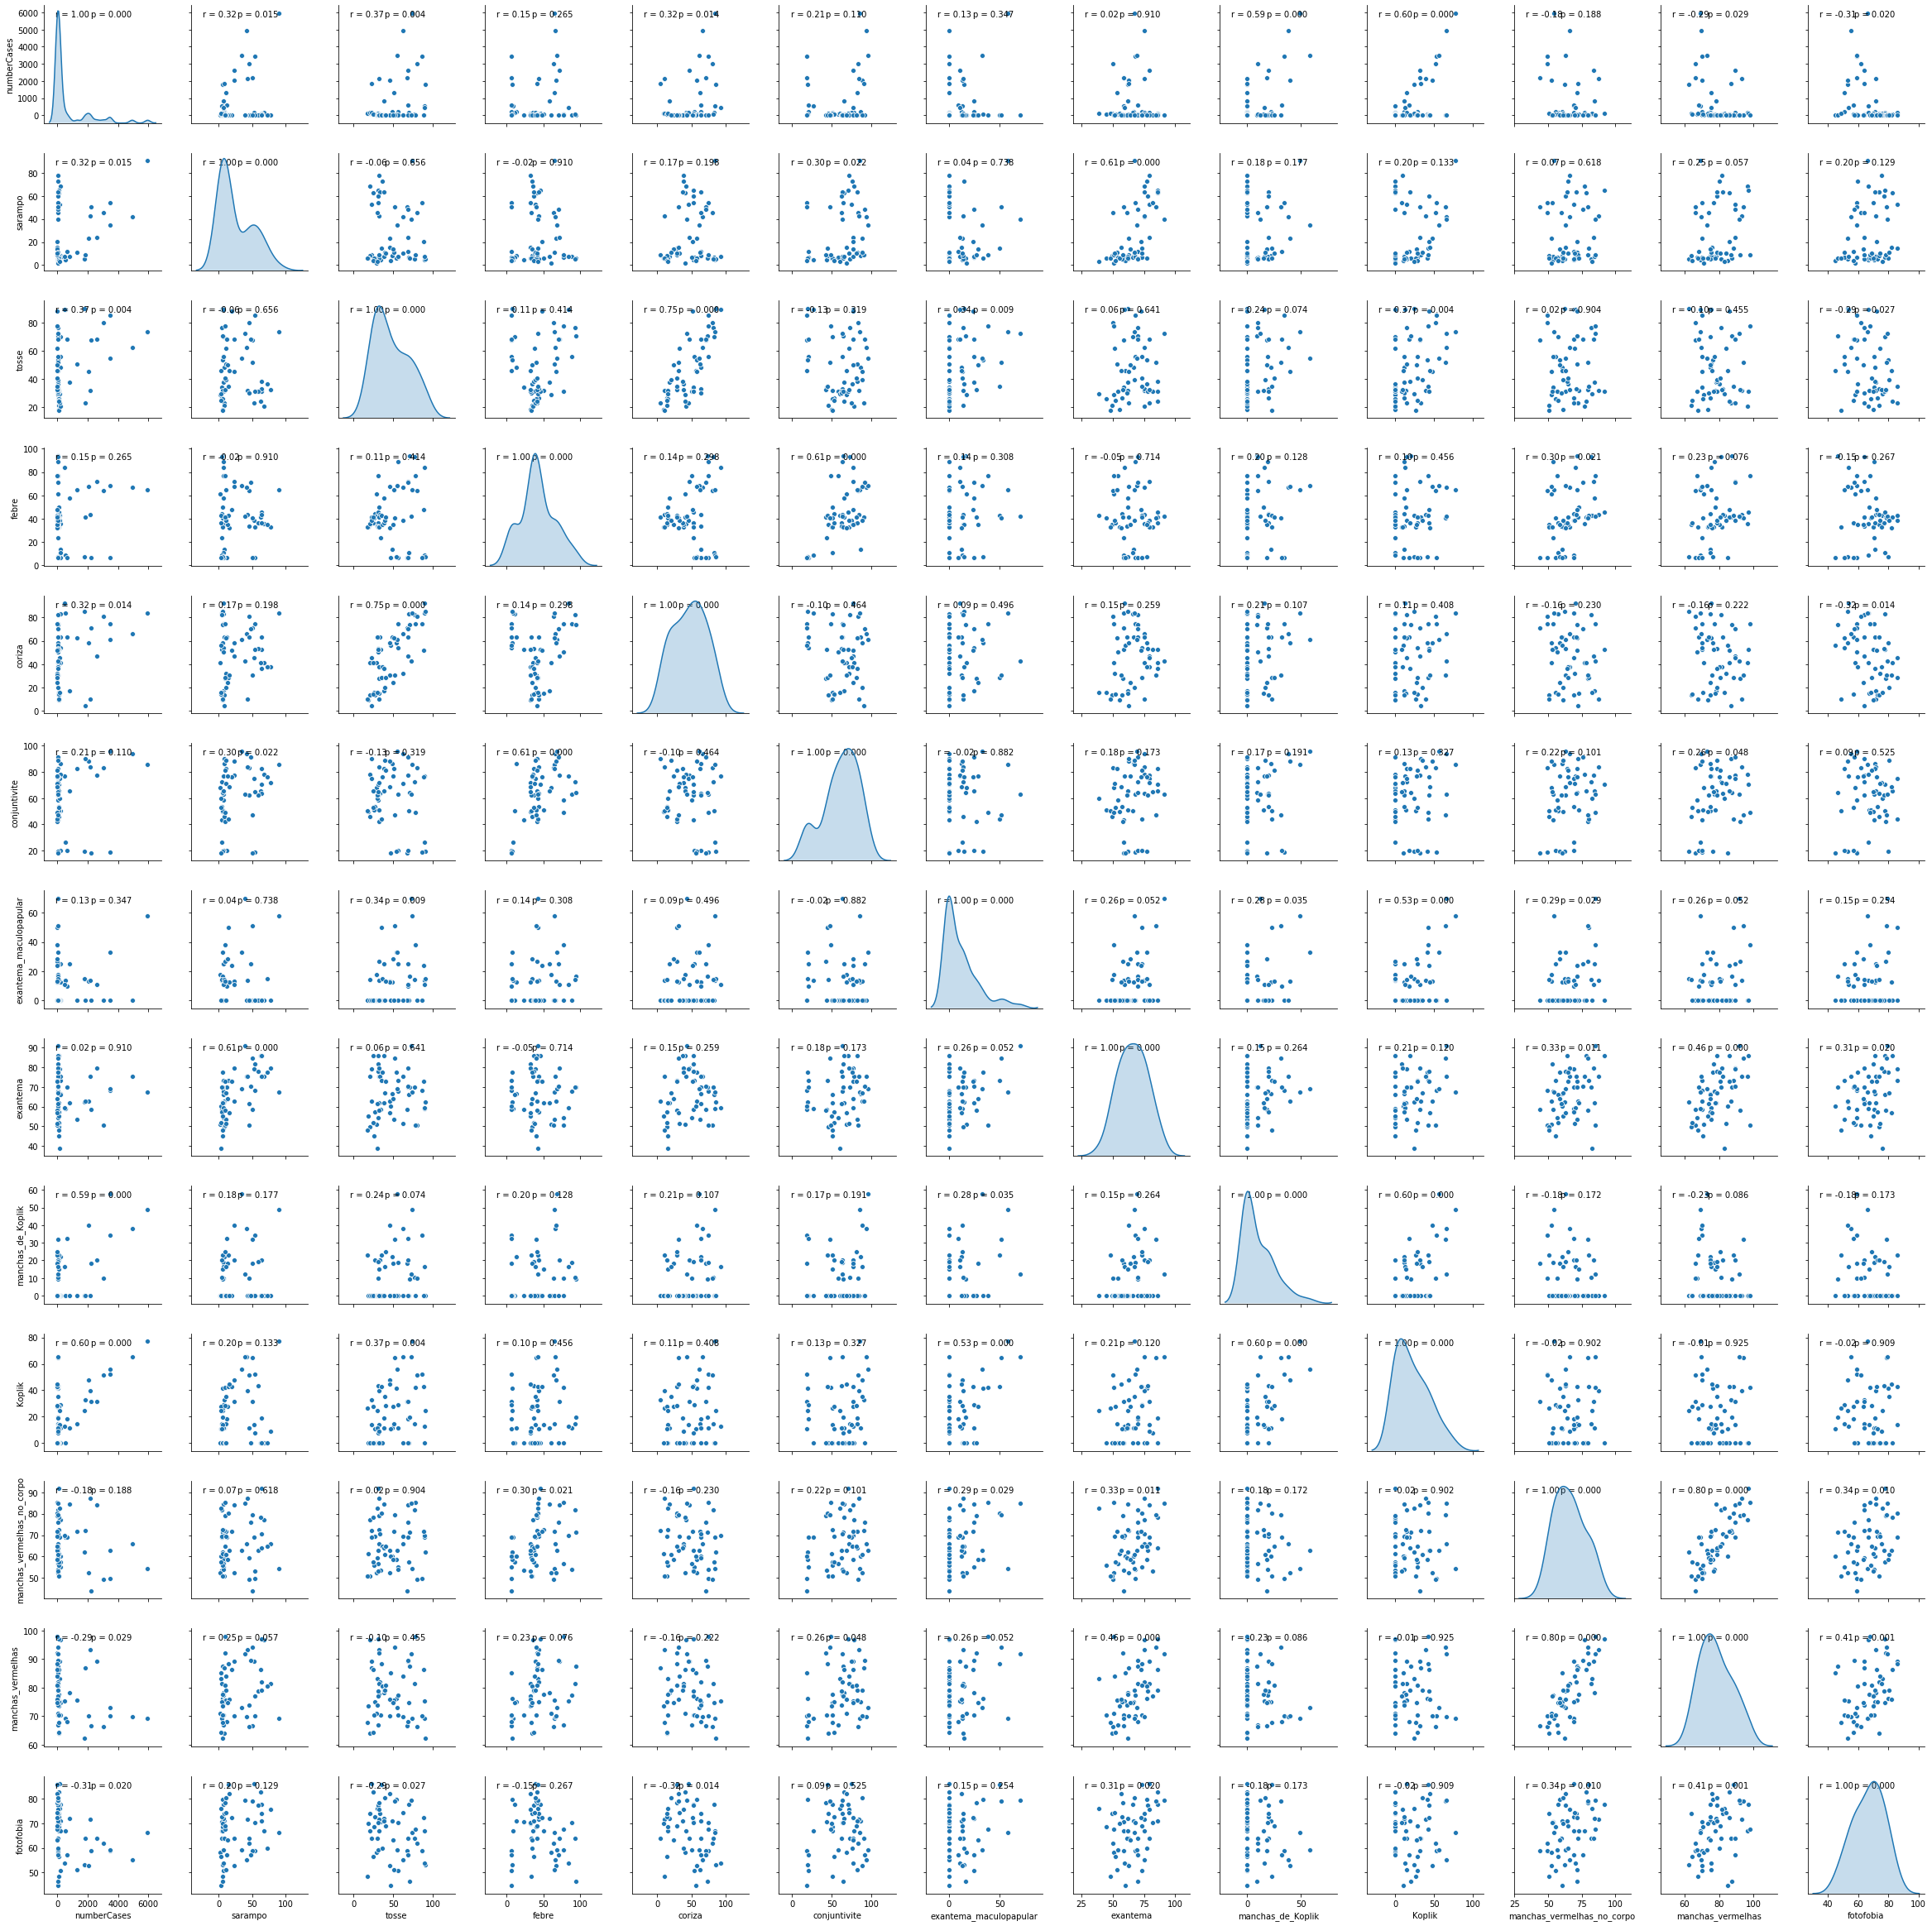

In [15]:
# In[ ]: Distribuições das variáveis, scatters, valores das correlações e suas
#respectivas significâncias

def corrfunc(x, y, **kws):
    (r, p) = pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f} ".format(r),
                xy=(.1, .9), xycoords=ax.transAxes)
    ax.annotate("p = {:.3f}".format(p),
                xy=(.4, .9), xycoords=ax.transAxes)

plt.figure(figsize=(15,10))
graph = sns.pairplot(df_corr, diag_kind="kde")
graph.map(corrfunc)
plt.show()

In [16]:
# In[ ]: Estimando um modelo múltiplo com as variáveis do dataset 'paises'

#Estimando a regressão múltipla
modelo_mult2 = sm.OLS.from_formula("numberCases ~ sarampo + febre + tosse + coriza + conjuntivite + exantema_maculopapular + exantema + manchas_de_Koplik + Koplik + manchas_vermelhas_no_corpo + manchas_vermelhas + fotofobia", df_f).fit()      

In [17]:
#Parâmetros do modelo
modelo_mult2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            numberCases   R-squared:                       0.691
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     8.377
Date:                Sat, 23 Mar 2024   Prob (F-statistic):           5.25e-08
Time:                        18:47:15   Log-Likelihood:                -463.76
No. Observations:                  58   AIC:                             953.5
Df Residuals:                      45   BIC:                             980.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   3405.1547   1330.677      2.559      0.014     725.034    6085.276
sarampo                       20.9731      6.397      3.278      0.002       8.088      33.858
febre                         -4.3713      7.425     -0.589      0.559     -19.326      10.584
tosse                          6.6820     10.481      0.638      0.527     -14.428      27.792
coriza                         4.7803      9.231      0.518      0.607     -13.811      23.372
conjuntivite                   8.9643      7.415      1.209      0.233      -5.971      23.899
exantema_maculopapular        -9.9582      8.856     -1.124      0.267     -27.795       7.879
exantema                     -28.9588     13.973     -2.072      0.044     -57.103      -0.815
manchas_de_Koplik             19.3865     10.691      1.813      0.076      -2.147      40.920
Koplik                        28.0312      8.284      3.384      0.001      11.345      44.717
manchas_vermelhas_no_corpo    34.8896     17.504      1.993      0.052      -0.366      70.145
manchas_vermelhas            -49.7579     22.495     -2.212      0.032     -95.066      -4.450
fotofobia                    -20.7272     12.974     -1.598      0.117     -46.857       5.403
==============================================================================
Omnibus:                        1.662   Durbin-Watson:                   1.023
Prob(Omnibus):                  0.436   Jarque-Bera (JB):                1.647
Skew:                           0.374   Prob(JB):                        0.439
Kurtosis:                       2.651   Cond. No.                     2.21e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
#Parâmetros do modelo com intervalos de confiança
#Nível de significância de 5% / Nível de confiança de 95%
modelo_mult2.conf_int(alpha=0.05)

,0,1
Intercept,725.033707,6085.275735
sarampo,8.088088,33.858202
febre,-19.326168,10.583562
tosse,-14.428413,27.792342
coriza,-13.811315,23.371921
conjuntivite,-5.970906,23.899434
exantema_maculopapular,-27.795219,7.878860
exantema,-57.102752,-0.814906
manchas_de_Koplik,-2.146945,40.919902
Koplik,11.345449,44.717029


In [19]:
# In[ ]: Procedimento Stepwise

# Instalação e carregamento da função 'stepwise' do pacote
#'stepwise_process.statsmodels'
#pip install "stepwise-process==2.5"
# Autores: Helder Prado Santos e Luiz Paulo Fávero
from stepwise_process.statsmodels import stepwise

# Estimação do modelo por meio do procedimento Stepwise
modelo_step_mult2 = stepwise(modelo_mult2, pvalue_limit=0.05)

Regression type: OLS 

Estimating model...: 
 numberCases ~ sarampo + febre + tosse + coriza + conjuntivite + exantema_maculopapular + exantema + manchas_de_Koplik + Koplik + manchas_vermelhas_no_corpo + manchas_vermelhas + fotofobia

 Discarding atribute "coriza" with p-value equal to 0.6070864028290874 

Estimating model...: 
 numberCases ~ sarampo + febre + tosse + conjuntivite + exantema_maculopapular + exantema + manchas_de_Koplik + Koplik + manchas_vermelhas_no_corpo + manchas_vermelhas + fotofobia

 Discarding atribute "febre" with p-value equal to 0.6555715202736623 

Estimating model...: 
 numberCases ~ sarampo + tosse + conjuntivite + exantema_maculopapular + exantema + manchas_de_Koplik + Koplik + manchas_vermelhas_no_corpo + manchas_vermelhas + fotofobia

 Discarding atribute "conjuntivite" with p-value equal to 0.2781719896067731 

Estimating model...: 
 numberCases ~ sarampo + tosse + exantema_maculopapular + exantema + manchas_de_Koplik + Koplik + manchas_vermelhas_no_co

In [20]:
# In[ ]: Teste de verificação da aderência dos resíduos à normalidade

# Teste de Shapiro-Wilk (n < 30)
#from scipy.stats import shapiro
#shapiro(modelo_linear.resid)

# Teste de Shapiro-Francia (n >= 30)
# Instalação e carregamento da função 'shapiroFrancia' do pacote
#'sfrancia'
# Autores: Luiz Paulo Fávero e Helder Prado Santos
#pip install sfrancia==1.0.8
from sfrancia import shapiroFrancia
shapiroFrancia(modelo_step_mult2.resid)

{'method': 'Shapiro-Francia normality test',
 'statistics W': 0.9864749737088063,
 'statistics z': -0.4446590214539486,
 'p-value': 0.6717169062641852}

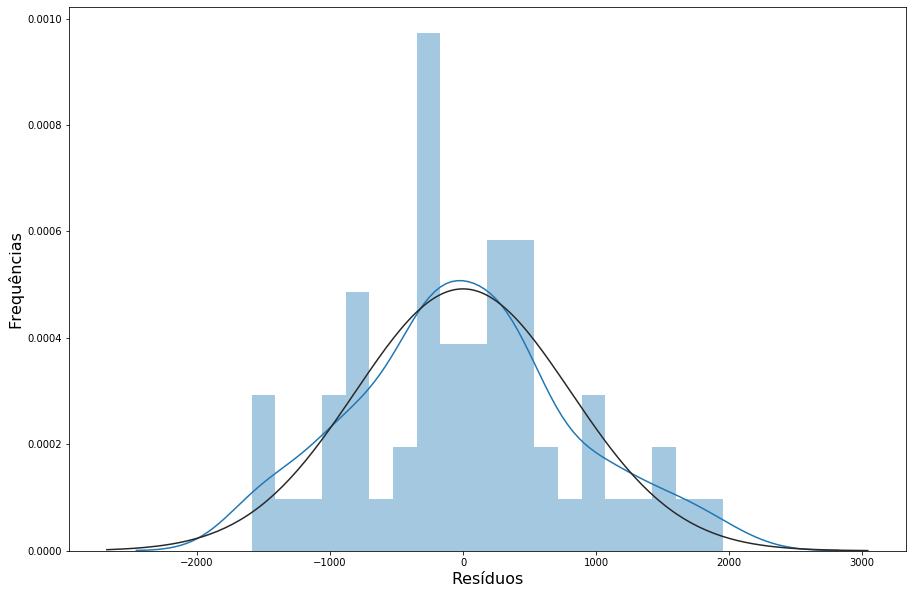

In [22]:
# In[ ]: Plotando os resíduos do modelo step_empresas e acrescentando
#uma curva normal teórica para comparação entre as distribuições

from scipy.stats import norm

plt.figure(figsize=(15,10))
sns.distplot(modelo_step_mult2.resid, fit=norm, kde=True, bins=20)
plt.xlabel('Resíduos', fontsize=16)
plt.ylabel('Frequências', fontsize=16)
plt.show()

In [ ]:
summary_col([modelo, modelo_step_mult],
            model_names=["SIMPLES","MULTIPLA"],
            stars=True,
            info_dict = {
                'N':lambda x: "{0:d}".format(int(x.nobs))
        })

,SIMPLES,MULTIPLA
Intercept,199.6224,-1141.6463***
,(239.9900),(412.8680)
sarampo,18.0986***,19.3799***
,(6.6062),(5.9395)
tosse,,26.6504***
,,(6.9983)
N,58,58


In [ ]:
df_f['yhat_simples'] = modelo.fittedvalues
df_f['yhat_step_mult'] = modelo_step_mult.fittedvalues

In [ ]:
df_f

,anomes,numberCases,sarampo,febre,tosse,yhat_simples,yhat_step_mult
0,201802,21,5.50,23.00,38.50,299.164771,-9.017928
1,201803,189,10.50,13.25,53.25,389.657798,480.974265
2,201804,184,7.80,10.20,72.20,340.791563,933.673118
3,201805,544,5.50,8.00,84.50,299.164771,1216.898971
4,201806,1808,6.50,7.25,90.00,317.263376,1382.855846
5,201807,3463,62.80,7.00,86.00,1336.214867,2367.340202
6,201808,2211,60.50,6.25,70.00,1294.588074,1896.360658
7,201809,614,13.80,6.60,70.00,449.383196,991.321439
8,201810,225,8.00,6.50,56.00,344.411284,505.813138
9,201811,53,6.75,6.75,56.75,321.788027,501.576095


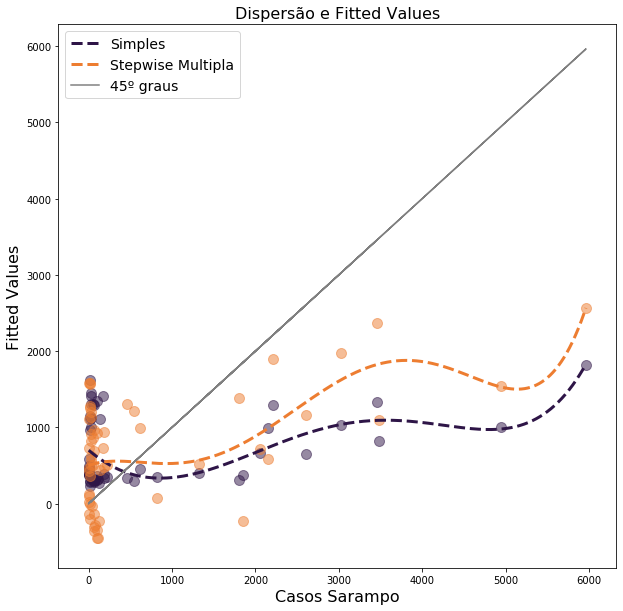

In [ ]:
# In[ ]: Ajustes dos modelos: valores previstos (fitted values) X valores reais

from scipy.optimize import curve_fit

def objective(x, a, b, c, d, e, f):
    return (a * x) + (b * x**2) + (c * x**3) + (d * x**4) + (e * x**5) + f

xdata = df_f['numberCases']
ydata_simp = df_f['yhat_simples']
ydata_mult = df_f['yhat_step_mult']

plt.figure(figsize=(10,10))

popt, _ = curve_fit(objective, xdata, ydata_simp)
a, b, c, d, e, f = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e, f)
plt.plot(x_line, y_line, '--', color='#2e1547', linewidth=3)

popt, _ = curve_fit(objective, xdata, ydata_mult)
a, b, c, d, e, f = popt
x_line = np.arange(min(xdata), max(xdata), 1)
y_line = objective(x_line, a, b, c, d, e, f)
plt.plot(x_line, y_line, '--', color='#ed7d31', linewidth=3)

plt.plot(xdata,xdata, color='gray', linestyle='-')
plt.scatter(xdata,ydata_simp, alpha=0.5, s=100, color='#2e1547')
plt.scatter(xdata,ydata_mult, alpha=0.5, s=100, color='#ed7d31')
plt.xlabel('Casos Sarampo', fontsize=16)
plt.ylabel('Fitted Values', fontsize=16)
plt.legend(['Simples','Stepwise Multipla','45º graus'], fontsize=14)
plt.title('Dispersão e Fitted Values', fontsize=16)
plt.show()

In [ ]:
# Diagnóstico de multicolinearidade (Variance Inflation Factor e Tolerance)

from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df_f[['sarampo','tosse']]
X = sm.add_constant(X)

vif = pd.Series([variance_inflation_factor(X.values, i)
                 for i in range(X.shape[1])],index=X.columns)
vif

tolerance = 1/vif
tolerance

pd.concat([vif,tolerance], axis=1, keys=['VIF', 'Tolerance'])

,VIF,Tolerance
const,8.050267,0.124219
sarampo,1.003219,0.996791
tosse,1.003219,0.996791


In [ ]:
# In[ ]: Função para o teste de Breusch-Pagan para a elaboração
# de diagnóstico de heterocedasticidade


# Criação da função 'breusch_pagan_test'

from scipy import stats

def breusch_pagan_test(modelo):

    df = pd.DataFrame({'yhat':modelo.fittedvalues,
                       'resid':modelo.resid})
   
    df['up'] = (np.square(df.resid))/np.sum(((np.square(df.resid))/df.shape[0]))
   
    modelo_aux = sm.OLS.from_formula('up ~ yhat', df).fit()
   
    anova_table = sm.stats.anova_lm(modelo_aux, typ=2)
   
    anova_table['sum_sq'] = anova_table['sum_sq']/2
    
    chisq = anova_table['sum_sq'].iloc[0]
   
    p_value = stats.chi2.pdf(chisq, 1)*2
    
    print(f"chisq: {chisq}")
    
    print(f"p-value: {p_value}")
    
    return chisq, p_value


# In[ ]: Teste de Breusch-Pagan propriamente dito

breusch_pagan_test(modelo_step_mult)
#Presença de heterocedasticidade -> omissão de variável(is) explicativa(s)
#relevante(s)

#H0 do teste: ausência de heterocedasticidade.
#H1 do teste: heterocedasticidade, ou seja, correlação entre resíduos e
#uma ou mais variáveis explicativas, o que indica omissão de
#variável relevante!

chisq: 24.44134664952258
p-value: 7.952551790072926e-07


(24.44134664952258, 7.952551790072926e-07)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 2 columns):
anomes         58 non-null int64
numberCases    58 non-null int64
dtypes: int64(2)
memory usage: 1.0 KB


In [ ]:
df

,anomes,numberCases
0,201802,21
1,201803,189
2,201804,184
3,201805,544
4,201806,1808
5,201807,3463
6,201808,2211
7,201809,614
8,201810,225
9,201811,53
